In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials


In [2]:
secrets_file = open("secrets.txt","r") # exact file name or the path of the file where it comes from.
string = secrets_file.read()


In [3]:
secrets_dict={}
for line in string.split('\n'):
    if len(line) > 0:
        print(line.split(':'))# gives a list 
        secrets_dict[line.split(':')[0]]=line.split(':')[1] 
        


['cid', '3ff19e99b13f4376a0e01e3a56ee6d40']
['csecret', '9c17a9a9f8f84b0bb8967f84bc4dab7c']


In [4]:
#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['cid'],
                                                           client_secret=secrets_dict['csecret']))


In [5]:
# Reusable functions
def get_name_artists_from_track(track):
    return [(track["name"],artist["name"], track["uri"]) for artist in track["artists"]]

def flatten(input_list):
    return [item for sublist in input_list for item in sublist]

#first we need to get a list of individual tracks from the playlist
def get_name_artist_from_playlist_item(playlist_item):
    return get_name_artists_from_track(playlist_item['track'])

def get_name_artists_from_playlist_items(playlist_items):
    return flatten(list(map(get_name_artist_from_playlist_item,playlist_items)))

In [8]:
# Get all the tracks from a playlist by applying pagination
from random import randint
from time import sleep

def get_playlist_items(playlist_id):
    results = sp.user_playlist_tracks("spotify",playlist_id)
    items = results['items']
    while results['next']!=None:
        print('Fetching {0} page out of {1}'.format(results['offset'], results['total']))
        results = sp.next(results)
        items = items + results['items']
        sleep(randint(1,3))
    print('Done!')
    return items

In [9]:
# this will take at least around num_songs_in_playlist * (avg_sleep_time + processing_time) = (number of songs/100) * (2+0.1) = 110 seconds

playlists = ['2HTcOvM2Yq1qNRsGIsW0nW',]
all_items = []
for playlist in playlists:
    all_items.extend(get_playlist_items(playlist))
len(all_items)

Fetching 0 page out of 8080
Fetching 100 page out of 8080
Fetching 200 page out of 8080
Fetching 300 page out of 8080
Fetching 400 page out of 8080
Fetching 500 page out of 8080
Fetching 600 page out of 8080
Fetching 700 page out of 8080
Fetching 800 page out of 8080
Fetching 900 page out of 8080
Fetching 1000 page out of 8080
Fetching 1100 page out of 8080
Fetching 1200 page out of 8080
Fetching 1300 page out of 8080
Fetching 1400 page out of 8080
Fetching 1500 page out of 8080
Fetching 1600 page out of 8080
Fetching 1700 page out of 8080
Fetching 1800 page out of 8080
Fetching 1900 page out of 8080
Fetching 2000 page out of 8080
Fetching 2100 page out of 8080
Fetching 2200 page out of 8080
Fetching 2300 page out of 8080
Fetching 2400 page out of 8080
Fetching 2500 page out of 8080
Fetching 2600 page out of 8080
Fetching 2700 page out of 8080
Fetching 2800 page out of 8080
Fetching 2900 page out of 8080
Fetching 3000 page out of 8080
Fetching 3100 page out of 8080
Fetching 3200 page o

8080

In [10]:
track_data = get_name_artists_from_playlist_items(all_items)
track_data[0:10]

[("Hey Leroy, Your Mama's Calling You",
  'Jimmy Castor',
  'spotify:track:6DPdkuilLYzkZIGr53HsrG'),
 ('Bang, Bang', 'Jimmy Castor', 'spotify:track:6puSkh7Unbn3avNFvZMZz1'),
 ('All I Ever Wanted',
  'The Human League',
  'spotify:track:33g1XVNgo3lbDLeRiRQ0TL'),
 ('Big Time Sensuality - The Fluke Minimix',
  'Björk',
  'spotify:track:4Q8b1l8daZE9ALzkd6kKzL'),
 ('Big Time Sensuality - The Fluke Minimix',
  'Fluke',
  'spotify:track:4Q8b1l8daZE9ALzkd6kKzL'),
 ('Fata Morgana - Original Mix',
  'Der Dritte Raum',
  'spotify:track:1yzgJNsnTGZacmsrcvZL4V'),
 ('Bad Reputation',
  'Joan Jett & the Blackhearts',
  'spotify:track:5M5ySjWYS4s6hi2pEvEwb5'),
 ('My Window', 'The Residents', 'spotify:track:61t7MU96q1DWE8eXBsUGua'),
 ('Winchester Cathedral',
  'Jimmy Castor',
  'spotify:track:5fPsQzd4GMMPt7qePOxnAX'),
 ('Donna', 'Rubblebucket', 'spotify:track:5UuVuVCEag2VYp8PdWB2eB')]

In [11]:
import pandas as pd

# Converted track name, artist name and uri from the above to dataframe for merging it with audo features

track_df = pd.DataFrame(track_data, columns = ['track_name', 'artist_name', 'uri'])
print(track_df.shape)
track_df.head(10)

(8686, 3)


,track_name,artist_name,uri
0,"Hey Leroy, Your Mama's Calling You",Jimmy Castor,spotify:track:6DPdkuilLYzkZIGr53HsrG
1,"Bang, Bang",Jimmy Castor,spotify:track:6puSkh7Unbn3avNFvZMZz1
2,All I Ever Wanted,The Human League,spotify:track:33g1XVNgo3lbDLeRiRQ0TL
3,Big Time Sensuality - The Fluke Minimix,Björk,spotify:track:4Q8b1l8daZE9ALzkd6kKzL
4,Big Time Sensuality - The Fluke Minimix,Fluke,spotify:track:4Q8b1l8daZE9ALzkd6kKzL
5,Fata Morgana - Original Mix,Der Dritte Raum,spotify:track:1yzgJNsnTGZacmsrcvZL4V
6,Bad Reputation,Joan Jett & the Blackhearts,spotify:track:5M5ySjWYS4s6hi2pEvEwb5
7,My Window,The Residents,spotify:track:61t7MU96q1DWE8eXBsUGua
8,Winchester Cathedral,Jimmy Castor,spotify:track:5fPsQzd4GMMPt7qePOxnAX
9,Donna,Rubblebucket,spotify:track:5UuVuVCEag2VYp8PdWB2eB


In [12]:
all_items[0]['track']['uri']

'spotify:track:6DPdkuilLYzkZIGr53HsrG'

In [13]:
import numpy as np

def get_track_uri(item):
    return item['track']['uri']

def get_track_uris(items):
    return list(map(get_track_uri, items))

track_uris = get_track_uris(all_items)
print(len(track_uris))

# Filter out non track uris (spotify:local:songname) as they cause error during fetching audio features
track_uris = list(filter(lambda x: 'spotify:track:' in x, track_uris))
print(len(track_uris))

# took from the stackoverflow "https://stackoverflow.com/questions/312443/how-do-i-split-a-list-into-equally-sized-chunks"

def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

# Split track_uris list in to chunks of 100 (sub list), so that I can use bulk audio_features request, instead of one by one
track_uris_batch = list(chunks(track_uris, 100))
track_uris_batch[0:2]

8080
8076


[['spotify:track:6DPdkuilLYzkZIGr53HsrG',
  'spotify:track:6puSkh7Unbn3avNFvZMZz1',
  'spotify:track:33g1XVNgo3lbDLeRiRQ0TL',
  'spotify:track:4Q8b1l8daZE9ALzkd6kKzL',
  'spotify:track:1yzgJNsnTGZacmsrcvZL4V',
  'spotify:track:5M5ySjWYS4s6hi2pEvEwb5',
  'spotify:track:61t7MU96q1DWE8eXBsUGua',
  'spotify:track:5fPsQzd4GMMPt7qePOxnAX',
  'spotify:track:5UuVuVCEag2VYp8PdWB2eB',
  'spotify:track:43ievcG8mUfVBVn5OJkTrC',
  'spotify:track:1SgN3j9jMbcZuiyrSnISz9',
  'spotify:track:50NbWayQdJBN6bOMAX6ToV',
  'spotify:track:0EYKD5N0mldDeVTCzCfzqr',
  'spotify:track:6ZtUudtvm3fmY1lH7DUyOI',
  'spotify:track:0Z8A6Kg5RNijfaRoGF2p64',
  'spotify:track:4UncGeJfZIIhAuXbINRf5E',
  'spotify:track:6SFCvojUWUqdWldrwVbOOT',
  'spotify:track:0BzPIlaQ5NGAWXmYcGxjwW',
  'spotify:track:5M6hQO5GP9LiOX1mDnCkfB',
  'spotify:track:3LcupwswRKl1ksF8moWX9H',
  'spotify:track:6rDeD5wQ1vcAMG2SpQOPed',
  'spotify:track:25zeHP11go4rGsTdMmrQI7',
  'spotify:track:5GfBJkcVh9BYrmTssKuO2n',
  'spotify:track:1ZWbfmoCmTmEFf02h

In [14]:
# For all the tracks, get the audio features one by one and append it to a list
audio_features = []
for i, track_uri in enumerate(track_uris_batch):
    print('Fetching audio feature for track number {0} from {1}'.format(i, len(track_uris_batch)))
    audio_feature = sp.audio_features(track_uri)
    audio_features.extend(audio_feature)
    sleep(randint(1,3))
print('Done')
audio_features[0:50]

Fetching audio feature for track number 0 from 81
Fetching audio feature for track number 1 from 81
Fetching audio feature for track number 2 from 81
Fetching audio feature for track number 3 from 81
Fetching audio feature for track number 4 from 81
Fetching audio feature for track number 5 from 81
Fetching audio feature for track number 6 from 81
Fetching audio feature for track number 7 from 81
Fetching audio feature for track number 8 from 81
Fetching audio feature for track number 9 from 81
Fetching audio feature for track number 10 from 81
Fetching audio feature for track number 11 from 81
Fetching audio feature for track number 12 from 81
Fetching audio feature for track number 13 from 81
Fetching audio feature for track number 14 from 81
Fetching audio feature for track number 15 from 81
Fetching audio feature for track number 16 from 81
Fetching audio feature for track number 17 from 81
Fetching audio feature for track number 18 from 81
Fetching audio feature for track number 1

[{'danceability': 0.714,
  'energy': 0.765,
  'key': 0,
  'loudness': -9.38,
  'mode': 1,
  'speechiness': 0.0406,
  'acousticness': 0.41,
  'instrumentalness': 0.508,
  'liveness': 0.119,
  'valence': 0.961,
  'tempo': 105.796,
  'type': 'audio_features',
  'id': '6DPdkuilLYzkZIGr53HsrG',
  'uri': 'spotify:track:6DPdkuilLYzkZIGr53HsrG',
  'track_href': 'https://api.spotify.com/v1/tracks/6DPdkuilLYzkZIGr53HsrG',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6DPdkuilLYzkZIGr53HsrG',
  'duration_ms': 148440,
  'time_signature': 4},
 {'danceability': 0.655,
  'energy': 0.878,
  'key': 3,
  'loudness': -9.544,
  'mode': 1,
  'speechiness': 0.0312,
  'acousticness': 0.833,
  'instrumentalness': 0.000402,
  'liveness': 0.0888,
  'valence': 0.936,
  'tempo': 129.957,
  'type': 'audio_features',
  'id': '6puSkh7Unbn3avNFvZMZz1',
  'uri': 'spotify:track:6puSkh7Unbn3avNFvZMZz1',
  'track_href': 'https://api.spotify.com/v1/tracks/6puSkh7Unbn3avNFvZMZz1',
  'analysis_url': 'https://

In [15]:
# Convert audio features list (of dict) to a dataframe. Because we can merge it with the track name, artist name dataframe we have created above in the next step
audio_features_df = pd.DataFrame(audio_features)
audio_features_df.head(50)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.714,0.765,0,-9.380,1,0.0406,0.410000,0.508000,0.1190,0.9610,105.796,audio_features,6DPdkuilLYzkZIGr53HsrG,spotify:track:6DPdkuilLYzkZIGr53HsrG,https://api.spotify.com/v1/tracks/6DPdkuilLYzk...,https://api.spotify.com/v1/audio-analysis/6DPd...,148440,4
1,0.655,0.878,3,-9.544,1,0.0312,0.833000,0.000402,0.0888,0.9360,129.957,audio_features,6puSkh7Unbn3avNFvZMZz1,spotify:track:6puSkh7Unbn3avNFvZMZz1,https://api.spotify.com/v1/tracks/6puSkh7Unbn3...,https://api.spotify.com/v1/audio-analysis/6puS...,188160,4
2,0.649,0.789,0,-9.466,1,0.0264,0.004410,0.000002,0.0859,0.9310,129.549,audio_features,33g1XVNgo3lbDLeRiRQ0TL,spotify:track:33g1XVNgo3lbDLeRiRQ0TL,https://api.spotify.com/v1/tracks/33g1XVNgo3lb...,https://api.spotify.com/v1/audio-analysis/33g1...,234333,4
3,0.644,0.785,8,-8.642,1,0.0284,0.000320,0.116000,0.0451,0.6680,116.938,audio_features,4Q8b1l8daZE9ALzkd6kKzL,spotify:track:4Q8b1l8daZE9ALzkd6kKzL,https://api.spotify.com/v1/tracks/4Q8b1l8daZE9...,https://api.spotify.com/v1/audio-analysis/4Q8b...,293840,4
4,0.810,0.658,2,-9.676,1,0.0463,0.003480,0.922000,0.0744,0.7430,126.009,audio_features,1yzgJNsnTGZacmsrcvZL4V,spotify:track:1yzgJNsnTGZacmsrcvZL4V,https://api.spotify.com/v1/tracks/1yzgJNsnTGZa...,https://api.spotify.com/v1/audio-analysis/1yzg...,339524,4
5,0.385,0.975,6,-4.099,1,0.1920,0.001970,0.016700,0.0602,0.8210,204.397,audio_features,5M5ySjWYS4s6hi2pEvEwb5,spotify:track:5M5ySjWYS4s6hi2pEvEwb5,https://api.spotify.com/v1/tracks/5M5ySjWYS4s6...,https://api.spotify.com/v1/audio-analysis/5M5y...,170841,4
6,0.205,0.246,8,-16.175,1,0.0313,0.245000,0.602000,0.1110,0.0343,97.059,audio_features,61t7MU96q1DWE8eXBsUGua,spotify:track:61t7MU96q1DWE8eXBsUGua,https://api.spotify.com/v1/tracks/61t7MU96q1DW...,https://api.spotify.com/v1/audio-analysis/61t7...,320960,3
7,0.756,0.803,2,-9.508,0,0.0956,0.427000,0.072400,0.0824,0.8780,136.568,audio_features,5fPsQzd4GMMPt7qePOxnAX,spotify:track:5fPsQzd4GMMPt7qePOxnAX,https://api.spotify.com/v1/tracks/5fPsQzd4GMMP...,https://api.spotify.com/v1/audio-analysis/5fPs...,163800,4
8,0.572,0.942,11,-3.660,0,0.0448,0.002800,0.055900,0.3500,0.8140,112.014,audio_features,5UuVuVCEag2VYp8PdWB2eB,spotify:track:5UuVuVCEag2VYp8PdWB2eB,https://api.spotify.com/v1/tracks/5UuVuVCEag2V...,https://api.spotify.com/v1/audio-analysis/5UuV...,213813,4
9,0.712,0.680,1,-8.132,1,0.0966,0.135000,0.000000,0.6290,0.5270,99.074,audio_features,43ievcG8mUfVBVn5OJkTrC,spotify:track:43ievcG8mUfVBVn5OJkTrC,https://api.spotify.com/v1/tracks/43ievcG8mUfV...,https://api.spotify.com/v1/audio-analysis/43ie...,243373,4


In [16]:
# Now I am merging the original dataframe with audio features df. The common column between these two DF is uri, so audio features will be duplicated for every track in the original dataframe
df = pd.merge(track_df, audio_features_df)
print(df.shape)
df.head(10)

(8682, 20)


,track_name,artist_name,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature
0,"Hey Leroy, Your Mama's Calling You",Jimmy Castor,spotify:track:6DPdkuilLYzkZIGr53HsrG,0.714,0.765,0,-9.380,1,0.0406,0.41000,0.508000,0.1190,0.9610,105.796,audio_features,6DPdkuilLYzkZIGr53HsrG,https://api.spotify.com/v1/tracks/6DPdkuilLYzk...,https://api.spotify.com/v1/audio-analysis/6DPd...,148440,4
1,"Bang, Bang",Jimmy Castor,spotify:track:6puSkh7Unbn3avNFvZMZz1,0.655,0.878,3,-9.544,1,0.0312,0.83300,0.000402,0.0888,0.9360,129.957,audio_features,6puSkh7Unbn3avNFvZMZz1,https://api.spotify.com/v1/tracks/6puSkh7Unbn3...,https://api.spotify.com/v1/audio-analysis/6puS...,188160,4
2,All I Ever Wanted,The Human League,spotify:track:33g1XVNgo3lbDLeRiRQ0TL,0.649,0.789,0,-9.466,1,0.0264,0.00441,0.000002,0.0859,0.9310,129.549,audio_features,33g1XVNgo3lbDLeRiRQ0TL,https://api.spotify.com/v1/tracks/33g1XVNgo3lb...,https://api.spotify.com/v1/audio-analysis/33g1...,234333,4
3,Big Time Sensuality - The Fluke Minimix,Björk,spotify:track:4Q8b1l8daZE9ALzkd6kKzL,0.644,0.785,8,-8.642,1,0.0284,0.00032,0.116000,0.0451,0.6680,116.938,audio_features,4Q8b1l8daZE9ALzkd6kKzL,https://api.spotify.com/v1/tracks/4Q8b1l8daZE9...,https://api.spotify.com/v1/audio-analysis/4Q8b...,293840,4
4,Big Time Sensuality - The Fluke Minimix,Fluke,spotify:track:4Q8b1l8daZE9ALzkd6kKzL,0.644,0.785,8,-8.642,1,0.0284,0.00032,0.116000,0.0451,0.6680,116.938,audio_features,4Q8b1l8daZE9ALzkd6kKzL,https://api.spotify.com/v1/tracks/4Q8b1l8daZE9...,https://api.spotify.com/v1/audio-analysis/4Q8b...,293840,4
5,Fata Morgana - Original Mix,Der Dritte Raum,spotify:track:1yzgJNsnTGZacmsrcvZL4V,0.810,0.658,2,-9.676,1,0.0463,0.00348,0.922000,0.0744,0.7430,126.009,audio_features,1yzgJNsnTGZacmsrcvZL4V,https://api.spotify.com/v1/tracks/1yzgJNsnTGZa...,https://api.spotify.com/v1/audio-analysis/1yzg...,339524,4
6,Bad Reputation,Joan Jett & the Blackhearts,spotify:track:5M5ySjWYS4s6hi2pEvEwb5,0.385,0.975,6,-4.099,1,0.1920,0.00197,0.016700,0.0602,0.8210,204.397,audio_features,5M5ySjWYS4s6hi2pEvEwb5,https://api.spotify.com/v1/tracks/5M5ySjWYS4s6...,https://api.spotify.com/v1/audio-analysis/5M5y...,170841,4
7,My Window,The Residents,spotify:track:61t7MU96q1DWE8eXBsUGua,0.205,0.246,8,-16.175,1,0.0313,0.24500,0.602000,0.1110,0.0343,97.059,audio_features,61t7MU96q1DWE8eXBsUGua,https://api.spotify.com/v1/tracks/61t7MU96q1DW...,https://api.spotify.com/v1/audio-analysis/61t7...,320960,3
8,Winchester Cathedral,Jimmy Castor,spotify:track:5fPsQzd4GMMPt7qePOxnAX,0.756,0.803,2,-9.508,0,0.0956,0.42700,0.072400,0.0824,0.8780,136.568,audio_features,5fPsQzd4GMMPt7qePOxnAX,https://api.spotify.com/v1/tracks/5fPsQzd4GMMP...,https://api.spotify.com/v1/audio-analysis/5fPs...,163800,4
9,Donna,Rubblebucket,spotify:track:5UuVuVCEag2VYp8PdWB2eB,0.572,0.942,11,-3.660,0,0.0448,0.00280,0.055900,0.3500,0.8140,112.014,audio_features,5UuVuVCEag2VYp8PdWB2eB,https://api.spotify.com/v1/tracks/5UuVuVCEag2V...,https://api.spotify.com/v1/audio-analysis/5UuV...,213813,4


In [17]:
# Check for duplicates
df.duplicated().sum()

0

In [18]:
# Drop duplicates
df = df.drop_duplicates()
df.shape

(8682, 20)

In [162]:
df.to_csv('./spotify_audio_features.csv', index = False)
df.to_csv('./spotify_audio_features_8080.csv', index = False)

In [250]:
import glob
import os

In [251]:
files = os.path.join("/Users/ayeesha/ironhack/lab-web-scraping-single-page/spotify- api wrapper/csv_files", "spotify*.csv")
files


'/Users/ayeesha/ironhack/lab-web-scraping-single-page/spotify- api wrapper/csv_files/spotify*.csv'

In [252]:
files = glob.glob(files)

In [253]:
files

['/Users/ayeesha/ironhack/lab-web-scraping-single-page/spotify- api wrapper/csv_files/spotifyAudioFeaturesApril2019.csv',
 '/Users/ayeesha/ironhack/lab-web-scraping-single-page/spotify- api wrapper/csv_files/spotify_audio_features.csv',
 '/Users/ayeesha/ironhack/lab-web-scraping-single-page/spotify- api wrapper/csv_files/spotify_audio_features_8080.csv']

In [254]:
df_spotify = pd.concat(map(pd.read_csv, files), ignore_index=True)
display(df_spotify)


,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,...,speechiness,tempo,time_signature,valence,popularity,uri,type,id,track_href,analysis_url
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.00000,1,0.0812,...,0.4090,203.927,4,0.118,15.0,NaN,NaN,NaN,NaN,NaN
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.00000,8,0.2860,...,0.4570,159.009,4,0.371,0.0,NaN,NaN,NaN,NaN,NaN
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.00000,9,0.0824,...,0.0454,114.966,4,0.382,56.0,NaN,NaN,NaN,NaN,NaN
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.91200,5,0.0994,...,0.0701,123.003,4,0.641,0.0,NaN,NaN,NaN,NaN,NaN
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.87800,7,0.0332,...,0.0661,120.047,4,0.928,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156782,Antônio Carlos Jobim,NaN,Stone Flower,0.218000,0.579,198587,0.345,0.05520,9,0.0961,...,0.0438,97.972,4,0.626,NaN,spotify:track:5gKt31WKlTPGBtTVkfDIUG,audio_features,5gKt31WKlTPGBtTVkfDIUG,https://api.spotify.com/v1/tracks/5gKt31WKlTPG...,https://api.spotify.com/v1/audio-analysis/5gKt...
156783,Help Yourself,NaN,Old Man,0.282000,0.509,402200,0.234,0.46700,7,0.1130,...,0.0337,154.081,4,0.543,NaN,spotify:track:4VTgjtmey70UKd6Htb2yxI,audio_features,4VTgjtmey70UKd6Htb2yxI,https://api.spotify.com/v1/tracks/4VTgjtmey70U...,https://api.spotify.com/v1/audio-analysis/4VTg...
156784,Neil Young,NaN,Eldorado,0.012700,0.719,365267,0.403,0.00809,9,0.2550,...,0.0270,108.257,4,0.489,NaN,spotify:track:4D3qYj3LzPRUD6BOD3PGp6,audio_features,4D3qYj3LzPRUD6BOD3PGp6,https://api.spotify.com/v1/tracks/4D3qYj3LzPRU...,https://api.spotify.com/v1/audio-analysis/4D3q...
156785,Sea Level,NaN,Rain In Spain,0.130000,0.526,407092,0.754,0.35000,4,0.3400,...,0.0353,106.097,4,0.592,NaN,spotify:track:4jmpbm9CGmFXLq296WG5X5,audio_features,4jmpbm9CGmFXLq296WG5X5,https://api.spotify.com/v1/tracks/4jmpbm9CGmFX...,https://api.spotify.com/v1/audio-analysis/4jmp...


In [255]:

# print(df_spotify.duplicated().sum())


In [256]:
# df_spotify = df_spotify.drop_duplicates()
# df_spotify.shape

In [257]:
# df_spotify = df_spotify.dropna()
# df_spotify.shape

In [258]:
df_spotify.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156787 entries, 0 to 156786
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artist_name       156785 non-null  object 
 1   track_id          130663 non-null  object 
 2   track_name        156785 non-null  object 
 3   acousticness      156787 non-null  float64
 4   danceability      156787 non-null  float64
 5   duration_ms       156787 non-null  int64  
 6   energy            156787 non-null  float64
 7   instrumentalness  156787 non-null  float64
 8   key               156787 non-null  int64  
 9   liveness          156787 non-null  float64
 10  loudness          156787 non-null  float64
 11  mode              156787 non-null  int64  
 12  speechiness       156787 non-null  float64
 13  tempo             156787 non-null  float64
 14  time_signature    156787 non-null  int64  
 15  valence           156787 non-null  float64
 16  popularity        13

In [259]:
df_spotify = df_spotify.drop(["track_name","artist_name","uri","type","id","track_href","analysis_url", "mode", "time_signature", "track_id", "popularity"], axis = 1)


In [260]:
display(df_spotify.sample(20))
df_spotify.shape

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence
10929,0.008400,0.510,211719,0.803,0.000000,0,0.1580,-4.958,0.0647,139.762,0.380
60431,0.736000,0.580,96798,0.191,0.039600,8,0.1470,-14.681,0.0362,85.446,0.477
102199,0.043500,0.591,207920,0.743,0.000731,0,0.3620,-4.245,0.0456,160.019,0.251
102051,0.283000,0.659,155009,0.936,0.020700,2,0.1920,-3.519,0.0606,161.983,0.884
7359,0.052800,0.582,267959,0.711,0.001320,9,0.2220,-4.982,0.0446,135.322,0.630
131200,0.152000,0.449,252960,0.786,0.000000,4,0.0911,-5.438,0.0398,161.798,0.460
114438,0.022500,0.665,176121,0.631,0.000000,0,0.3050,-6.365,0.0402,141.093,0.581
126589,0.000185,0.635,250373,0.632,0.000000,5,0.0615,-8.210,0.2750,162.023,0.233
73733,0.001960,0.516,283419,0.936,0.000635,8,0.1300,-3.442,0.0562,129.931,0.360
53682,0.003960,0.769,218000,0.694,0.000215,8,0.1510,-10.199,0.1040,97.993,0.522


(156787, 11)

In [261]:
# Remove duplicates after dropping columns
print(df_spotify.duplicated().sum())

df_spotify = df_spotify.drop_duplicates()
df_spotify.shape

5574


(151213, 11)

In [262]:
print(df_spotify.isna().sum())
df_spotify = df_spotify.dropna()
df_spotify.shape

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
dtype: int64


(151213, 11)

In [263]:
# K-means
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


from matplotlib.lines import Line2D

In [264]:
X=df_spotify
from sklearn.preprocessing import StandardScaler

X_prep = StandardScaler().fit_transform(X)

# Now, all features will have the same weight.
pd.DataFrame(X_prep,columns=X.columns).sample(50)



,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence
37741,0.852855,-0.476289,-0.044362,0.151411,-0.596192,1.598689,-0.662650,0.500338,-0.245089,0.524284,-0.465951
147848,-0.904185,-0.679082,0.277761,0.728421,-0.595068,1.043160,-0.599826,-0.381366,-0.355168,0.144521,0.536594
47052,-0.958071,-0.401577,-1.191404,0.233284,2.036586,0.765396,-0.678960,-0.436442,-0.577007,1.401344,1.290416
138605,-0.792504,-0.465616,-0.414539,0.845383,-0.577424,-0.345662,-0.334032,0.308454,-0.629945,0.068314,1.619495
51891,0.137867,0.825849,-0.075887,1.305432,-0.596189,-1.456720,-0.791318,1.283290,0.005319,-0.004537,1.933269
93537,-0.402806,0.478968,-0.699729,0.981838,0.251700,1.043160,-0.448807,0.673114,0.249006,-0.169844,1.355466
102670,1.313757,-0.593695,-1.188408,-0.905142,1.912995,0.209867,-0.722454,-1.385266,-0.370294,-0.522346,0.532767
41282,1.712614,-0.246814,0.875754,-2.179633,1.697429,0.765396,0.010292,-1.984844,-0.519866,-0.314135,-0.795031
81786,-0.799004,-0.188111,0.033976,0.420423,-0.596007,-1.178956,-0.430684,0.555415,-0.644231,0.870273,1.401384
2347,-0.958176,1.242107,-0.775154,-0.043525,2.059580,0.765396,-0.672919,-0.223844,-0.333320,-0.002892,0.142463


In [270]:
kmeans.inertia_ 

1217440.9269576163

## choosing K

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

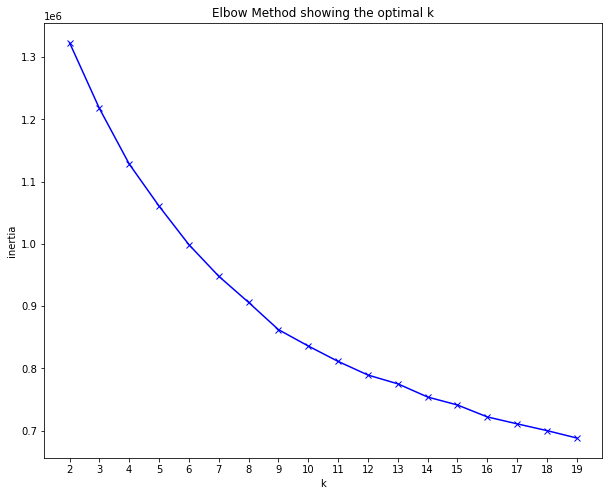

In [305]:
import numpy as np
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k)
                    
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [ ]:
# i think the elbow point is 9. so my K is 9.

In [ ]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

In [ ]:
-- I had 26000+ songs in my dataset and then i added the kaggle spotify playlist and my laptop is slow and its taking time to run.
-- when i tried with my 26000+ songs i got the "Slhouette score = 2". 

In [285]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=9)
kmeans.fit(X_prep)

KMeans(n_clusters=9)

In [286]:
clusters = kmeans.predict(X_prep)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    15997
1     8680
2    19463
3      111
4    29471
5    14713
6    26692
7    20447
8    15639
dtype: int64

In [287]:
clusters

array([5, 5, 4, ..., 4, 6, 6], dtype=int32)

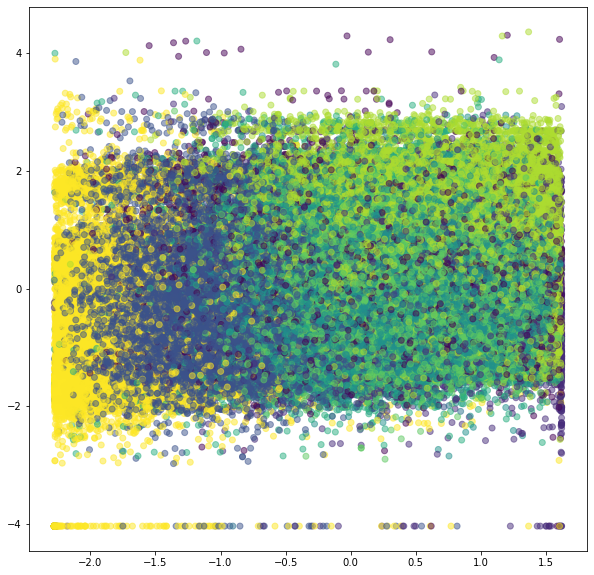

In [291]:
plt.figure(figsize=(10, 10))
plt.scatter(X_prep[:, 3], X_prep[:,9], c=clusters,alpha=0.5)
plt.show()

In [294]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import random

In [295]:
url = "https://www.billboard.com/charts/hot-100/"

In [296]:
response = requests.get(url)
response.status_code 

200

In [297]:
soup = BeautifulSoup(response.content, "html.parser")

In [299]:
song_singers = soup.select("ul.lrv-a-unstyle-list > li.o-chart-results-list__item.lrv-u-flex-grow-1.lrv-u-flex.lrv-u-flex-direction-column.lrv-u-justify-content-center.lrv-u-border-b-1.lrv-u-border-color-grey-light.lrv-u-padding-l-050")
#print(song_singers)

In [300]:
titles = []
singers = []
for i in song_singers:
    titles.append(i.select("h3#title-of-a-story")[0].get_text().strip()) # #- for accessing ID attribute.
    singers.append(i.select("span.c-label")[0].get_text().strip())
    
songs= pd.DataFrame({'song_title': titles, 'artists': singers})
print(songs.shape)


(99, 2)


In [301]:
def song_recommender():
    a = input("Enter your favorite song: ")
# here i changed the user input to lower case because end user can give the input in any case.
# also i want to give the recommendation for the user atleast one word matches.
# so i used inline looping.
    
    if((any(a.lower() in title for title in songs['song_title'].str.lower().values)) or (any(a.lower() in artist for artist in songs['artists'].str.lower().values))):

        ran_num = random.choice(songs['song_title'])
        print('Here you go ... We recommend this song for you \n ENJOY listening to the song:',ran_num)
    else:
        print("Sorry, your song is not on the list and we don't have recommendations")
        
        repeat=input("Do you want to try another song? y/n")
        if repeat == 'y':
            song_recommender()
        else:
            print("Thank you for using our song recommender!")


In [304]:
song_recommender()

Enter your favorite song: djhfj
Sorry, your song is not on the list and we don't have recommendations
Do you want to try another song? y/nn
Thank you for using our song recommender!
